In [1]:
!wget https://raw.githubusercontent.com/Sunilk240/LP5/main/BostonHousing.csv

--2025-05-07 17:42:42--  https://raw.githubusercontent.com/Sunilk240/LP5/main/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35735 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  34.90K  --.-KB/s    in 0.003s  

2025-05-07 17:42:42 (11.8 MB/s) - ‘BostonHousing.csv’ saved [35735/35735]



In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

2025-05-07 17:42:45.473151: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746639765.736193      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746639765.809834      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
!pip freeze > /kaggle/working/bostonrequirements.txt


In [4]:
# Load the dataset
data = pd.read_csv('BostonHousing.csv')

In [5]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.shape

(506, 14)

In [7]:
# prompt: find null values
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# Assume the target column is named 'MEDV'
X = data.drop("medv", axis=1)
Y = data["medv"]

In [10]:
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [12]:
# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-07 17:43:07.442447: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [14]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 237.6192 - mae: 11.7881 - val_loss: 21.3714 - val_mae: 2.9167
Epoch 2/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.2986 - mae: 2.9851 - val_loss: 21.8696 - val_mae: 3.1813
Epoch 3/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.1962 - mae: 2.9589 - val_loss: 13.6670 - val_mae: 2.3757
Epoch 4/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.3845 - mae: 2.4698 - val_loss: 13.6750 - val_mae: 2.4191
Epoch 5/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.3626 - mae: 2.6947 - val_loss: 13.1052 - val_mae: 2.3410
Epoch 6/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.0055 - mae: 2.7069 - val_loss: 18.1285 - val_mae: 3.2418
Epoch 7/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.5861 - mae: 2.3377 - val_loss: 16.4883 - val_mae: 2.9506
Epoch 8/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.1892 - mae: 2.4445 - val_loss: 11.7216 - val_mae: 2.3256
Epoch 9/100
404/404 ━━━━━━━━━━━

In [15]:
# Evalute the model
mse = model.evaluate(X_test, Y_test)
print("Mean Squared Error:", mse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9263 - mae: 2.1260  
Mean Squared Error: [10.08033275604248, 2.2178733348846436]


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Flatten if needed (in case model outputs shape (n,1) instead of (n,))
Y_train_pred = Y_train_pred.flatten()
Y_test_pred = Y_test_pred.flatten()

# Train Metrics
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)

# Test Metrics
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

# Output
print(f"Train MSE : {train_mse:.3f} | RMSE: {train_rmse:.3f} | MAE: {train_mae:.3f} | R²: {train_r2:.3f}")
print(f"Test  MSE : {test_mse:.3f} | RMSE: {test_rmse:.3f} | MAE: {test_mae:.3f} | R²: {test_r2:.3f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train MSE : 9.918 | RMSE: 3.149 | MAE: 2.136 | R²: 0.886
Test  MSE : 8.899 | RMSE: 2.983 | MAE: 1.943 | R²: 0.879


In [16]:
# Predictions
y_pred = model.predict(X_test)
print(y_pred[:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[27.368662]
 [33.079754]
 [17.007524]
 [24.159468]
 [16.193596]]


In [17]:
print(Y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: medv, Length: 102, dtype: float64


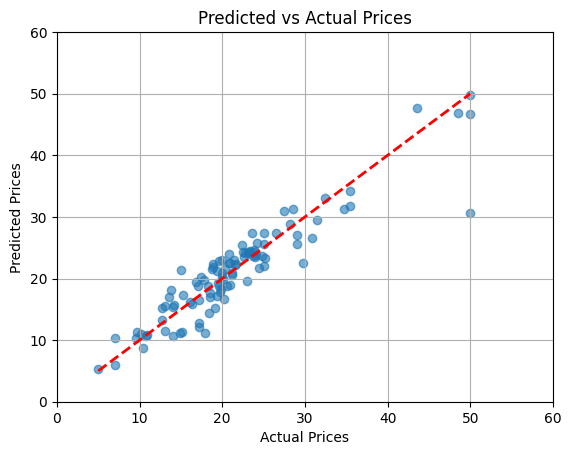

In [18]:
# Visualizing Predicted vs Actual Pricesplt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.grid()
plt.show()

In [ ]:
# ### 📘 Expanded Theory Behind Each Component

# ---

# #### **StandardScaler**

# StandardScaler standardizes features by removing the mean and scaling to unit variance.
# This ensures each feature contributes equally to the model’s learning process, improving convergence speed and model stability.

# ---

# #### **Dense Layers with ReLU Activation**

# Dense layers are fully connected layers where each neuron receives input from all neurons of the previous layer.
# ReLU (`Rectified Linear Unit`) introduces non-linearity, allowing the network to learn complex, nonlinear relationships in housing features.

# ---

# #### **Output Layer with One Unit**

# The final layer has a single neuron with no activation, producing a continuous output.
# This is ideal for regression problems like predicting house prices, where the target is a real number.

# ---

# #### **Loss Function: Mean Squared Error (MSE)**

# MSE computes the average of squared differences between predicted and actual values.
# It penalizes larger errors more than smaller ones, making it sensitive to outliers in regression tasks.

# ---

# #### **Optimizer: Adam**

# Adam is an adaptive learning rate optimizer combining the benefits of RMSprop and momentum.
# It adjusts learning rates during training based on first and second moments of gradients, enabling fast and reliable convergence.

# ---

# #### **Evaluation Metrics: MAE, RMSE, R²**

# * **MAE (Mean Absolute Error)** measures average magnitude of prediction errors, offering interpretability in original units.
# * **RMSE (Root Mean Squared Error)** is the square root of MSE, reflecting average error magnitude with greater penalty on large errors.
# * **R² (Coefficient of Determination)** shows how well the model explains the variance in target values, with 1 being perfect prediction.

# ---

# Let me know if you'd like a diagram of the network architecture or evaluation visualizations.
